# Name: TAZZI KARIM

## Classify images using Lenet-5-CNN architecture

Yann LeCun, Leon Bottou, Yosuha Bengio and Patrick Haffner proposed a neural network architecture for handwritten and machine-printed character recognition in 1990’s which they called LeNet-5.

The LeNet-5 architecture consists of two sets of convolutional and average pooling layers, followed by a flattening convolutional layer, then two fully-connected layers and finally a softmax classifier.

First Layer:

The input for LeNet-5 is a 32×32 grayscale image which passes through the first convolutional layer with 6 feature maps or filters having size 5×5 and a stride of one. The image dimensions changes from 32x32x1 to 28x28x6.

Second Layer:

Then the LeNet-5 applies average pooling layer or sub-sampling layer with a filter size 2×2 and a stride of two. The resulting image dimensions will be reduced to 14x14x6.

Third Layer:

Next, there is a second convolutional layer with 16 feature maps having size 5×5 and a stride of 1. In this layer, only 10 out of 16 feature maps are connected to 6 feature maps of the previous layer.



Fourth Layer:

The fourth layer (S4) is again an average pooling layer with filter size 2×2 and a stride of 2. This layer is the same as the second layer (S2) except it has 16 feature maps so the output will be reduced to 5x5x16.

Fifth Layer:

The fifth layer (C5) is a fully connected convolutional layer with 120 feature maps each of size 1×1. Each of the 120 units in C5 is connected to all the 400 nodes (5x5x16) in the fourth layer S4.

Sixth Layer:

The sixth layer is a fully connected layer (F6) with 84 units.

Output Layer:

Finally, there is a fully connected softmax output layer ŷ with 10 possible values corresponding to the following classes : 'airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship' and  'truck'

### Implementation

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_images[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C5
    keras.layers.Flatten(), #Flatten    
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [ ]:
lenet_5_model.compile(optimizer='adam',
 loss=keras.losses.sparse_categorical_crossentropy
 , metrics=['accuracy'])

In [ ]:
history = lenet_5_model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.7857 - accuracy: 0.3696 - val_loss: 1.6330 - val_accuracy: 0.4206
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.5579 - accuracy: 0.4492 - val_loss: 1.4914 - val_accuracy: 0.4724
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.4592 - accuracy: 0.4827 - val_loss: 1.4506 - val_accuracy: 0.4852
Epoch 4/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.3930 - accuracy: 0.5052 - val_loss: 1.4324 - val_accuracy: 0.4861
Epoch 5/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.3365 - accuracy: 0.5258 - val_loss: 1.3883 - val_accuracy: 0.5043
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.2856 - accuracy: 0.5467 - val_loss: 1.3604 - val_accuracy: 0.5165
Epoch 7/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.2363 - accuracy: 0.5613 - val_loss: 1.3278 -

313/313 - 3s - loss: 1.3265 - accuracy: 0.5346 - 3s/epoch - 10ms/step


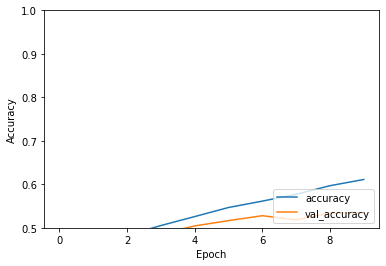

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')



In [ ]:
test_loss, test_acc = lenet_5_model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 3s - loss: 1.3265 - accuracy: 0.5346 - 3s/epoch - 10ms/step
